# Identify Fraude from Enron Email 

## Project 5

## Kris Anaya 


### Overview 

In 2000, Enron was one of the largest companies in the United States. By 2002, it had collapsed into bankruptcy due to widespread corporate fraud. In the resulting Federal investigation, a significant amount of typically confidential information entered into the public record, including tens of thousands of emails and detailed financial data for top executives. In this project, you will play detective, and put your new skills to use by building a person of interest identifier based on financial and email data made public as a result of the Enron scandal. To assist you in your detective work, we've combined this data with a hand-generated list of persons of interest in the fraud case, which means individuals who were indicted, reached a settlement or plea deal with the government, or testified in exchange for prosecution immunity. this notebook contains the necessary EDA for the report. 



In [283]:
#!/usr/bin/python

import sys 
import pickle 
import pandas as pd
import numpy as np 
import pprint


%pylab inline 
import matplotlib.pyplot as plot 
import seaborn as sns 


sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

Populating the interactive namespace from numpy and matplotlib


In [284]:
### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".

features_list = ['poi','salary','bonus'] # You will need to use more features

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file: 
    data_dict = pickle.load(data_file)



Let's take a look at the structure of the data file: 

In [285]:
### investiagting the dataset

print "The size of the data dictionary is:", len(data_dict)
print "\n"
print "sample of  features for POI possibility:", pprint.pprint(data_dict["LAY KENNETH L"])
print "\n"
print "lenght of the features within the data set (including POI):", len(data_dict["LAY KENNETH L"])




The size of the data dictionary is: 146


sample of  features for POI possibility:{'bonus': 7000000,
 'deferral_payments': 202911,
 'deferred_income': -300000,
 'director_fees': 'NaN',
 'email_address': 'kenneth.lay@enron.com',
 'exercised_stock_options': 34348384,
 'expenses': 99832,
 'from_messages': 36,
 'from_poi_to_this_person': 123,
 'from_this_person_to_poi': 16,
 'loan_advances': 81525000,
 'long_term_incentive': 3600000,
 'other': 10359729,
 'poi': True,
 'restricted_stock': 14761694,
 'restricted_stock_deferred': 'NaN',
 'salary': 1072321,
 'shared_receipt_with_poi': 2411,
 'to_messages': 4273,
 'total_payments': 103559793,
 'total_stock_value': 49110078}
 None


lenght of the features within the data set (including POI): 21


Essentially, we are looking at 146 unique individuals (possibly less once we remove some outliers). There are twenty-one features currently within the dataset POI is a boolean feature returning "True" if it is an interest or "False" if not. 

In [286]:
### dump data_dict into pandas df for EDA. 

### create df from list of values, create a series of employees and index
df = pd.DataFrame.from_records(list(data_dict.values()))
employees = pd.Series(list(data_dict.keys()))
df.set_index(employees, inplace = True)

### show head of df
df.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
METTS MARK,600000,NaN,NaN,NaN,mark.metts@enron.com,NaN,94299,29,38,1,...,NaN,1740,False,585062,NaN,365788,702,807,1061827,585062
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
ELLIOTT STEVEN,350000,NaN,-400729,NaN,steven.elliott@enron.com,4890344,78552,NaN,NaN,NaN,...,NaN,12961,False,1788391,NaN,170941,NaN,NaN,211725,6678735
CORDES WILLIAM R,NaN,NaN,NaN,NaN,bill.cordes@enron.com,651850,NaN,12,10,0,...,NaN,NaN,False,386335,NaN,NaN,58,764,NaN,1038185
HANNON KEVIN P,1500000,NaN,-3117011,NaN,kevin.hannon@enron.com,5538001,34039,32,32,21,...,1617011,11350,True,853064,NaN,243293,1035,1045,288682,6391065


When I look at the data frame above the first thing that pop out to me is the ```NaN``` values. This could present a possible challenge for the Machine Learning section. Let's see how many ```NaN``` are showing up. 

In [287]:
### show count of NaN values 
df["deferral_payments"].value_counts()

NaN         107
564348        1
2144013       1
7961          1
2157527       1
684694        1
2869717       1
77716         1
16586         1
93585         1
6426990       1
214678        1
3131860       1
10259         1
73122         1
27610         1
32083396      1
831299        1
774401        1
2964506       1
202911        1
181755        1
204075        1
1295738       1
53625         1
85430         1
1130036       1
649584        1
-102500       1
187469        1
50591         1
842924        1
181993        1
875307        1
260455        1
51365         1
178980        1
1848227       1
504610        1
227449        1
Name: deferral_payments, dtype: int64

It looks like there is about $107$ withint the $146$ individuals who do not include the defferal payments (73%). This could present us with a problem since it's such a high number. I would like to ignore the ```NaN``` values later for the machine learning phase in the my project, but for now I will just let all the missing ```NaN``` values be zero. 

In [288]:
### Replace "NaN" values for Zero.
df.replace("NaN", 0, inplace= True)

### Show that "Nan" values have been replaced by Zero. 
df["deferral_payments"].value_counts() 

 0           107
 50591         1
 6426990       1
 260455        1
-102500        1
 684694        1
 187469        1
 831299        1
 227449        1
 1130036       1
 875307        1
 204075        1
 178980        1
 504610        1
 2964506       1
 7961          1
 10259         1
 2144013       1
 774401        1
 649584        1
 181755        1
 1295738       1
 85430         1
 181993        1
 27610         1
 2157527       1
 2869717       1
 3131860       1
 16586         1
 32083396      1
 842924        1
 564348        1
 51365         1
 1848227       1
 73122         1
 202911        1
 214678        1
 77716         1
 93585         1
 53625         1
Name: deferral_payments, dtype: int64

In [289]:
### check if the data type are expected. 

df.dtypes


bonus                         int64
deferral_payments             int64
deferred_income               int64
director_fees                 int64
email_address                object
exercised_stock_options       int64
expenses                      int64
from_messages                 int64
from_poi_to_this_person       int64
from_this_person_to_poi       int64
loan_advances                 int64
long_term_incentive           int64
other                         int64
poi                            bool
restricted_stock              int64
restricted_stock_deferred     int64
salary                        int64
shared_receipt_with_poi       int64
to_messages                   int64
total_payments                int64
total_stock_value             int64
dtype: object

POI = "boolean" (0 = No, 1 = Yes), operation as described in the "Steps to Success" area. We have the following list as specified withitn the project details 

* **Finacial Features** - ['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees'] (all units are in US dollars)


* **Email Features ** -  ['to_messages', 'email_address', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi'] (units are generally number of emails messages; notable exception is ‘email_address’, which is a text string)


* **POI Label** - [‘poi’] (boolean, represented as integer)

In [290]:
### POIs / NON-POIs

print "POIs / NON-POIs: "
df['poi'].value_counts()

print "Percentage of POI / NON-POIs:"
df['poi'].value_counts(normalize = True)

POIs / NON-POIs: 
Percentage of POI / NON-POIs:


False    0.876712
True     0.123288
Name: poi, dtype: float64

The Non-POIs have a large percentage within the dataset at **88%** while the POIs fall withitn **12%** of the dataset.
Since we only have 146 samples within the dataset with once value percentile greater then the other we could see some potential problems withint the machien learning portion of the dataset. What we have learned from class is that have large and roboust data is more beneficial for our machine learning program to perform more accurately.

## Outliers 

From the outliers section within the introduction to machine learning we learned that what causes outliers is sensor malfunctioning, data entry errors and freak events. We need to investigate these outliers to see if there are any misplaced errors along the data set, this should be the easiest to tackle. We can explore this by visual representation of the data set or simply investigating the data set with brute force. Let's look at some plots of ``` total_payments ``` and ``` total_stock_value```. 

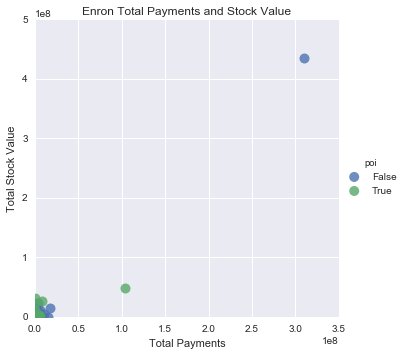

In [291]:
### import seaborn plot lmplot. 
### choose total_payments, total_stock_value and poi for boolean.
op = sns.lmplot(x = "total_payments", 
                y = "total_stock_value", 
                fit_reg = False, 
                hue = "poi",
                scatter_kws={"marker": "D",
                             "s": 100},
                data = df)

### set grid
plt.title("Enron Total Payments and Stock Value")
plt.xlabel("Total Payments")
plt.ylabel("Total Stock Value")
op.set(xlim=(0,None))
op.set(ylim=(0,None))

From the seaborn plot we see a large payment was sent out, over **300000000!!!**. First, this is quite a bit of money even for a payment of the enron magnitue, but another thing that strikes me as odd is that it's not even a person of interest. Let's do a bit more investigation.

In [292]:
### investigate 3*1e8 to locate the data cell.
df[df["total_payments"] > 1e8]

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
LAY KENNETH L,7000000,202911,-300000,0,kenneth.lay@enron.com,34348384,99832,36,123,16,...,3600000,10359729,True,14761694,0,1072321,2411,4273,103559793,49110078
TOTAL,97343619,32083396,-27992891,1398517,0,311764000,5235198,0,0,0,...,48521928,42667589,False,130322299,-7576788,26704229,0,0,309886585,434509511


As you can see that the amount **Total** was included in the total_payments summary, this is sum of all payments received by each the unique individuals. This is known as an outlier and should be removed. Secondly, I located another outlier by doing some brute force within our data set. I located the ```THE TRAVEL AGENCY IN THE PARK```. Ken Lay's younger sister Sharon Lay is the co-ownder of TAP, which recieved total payments of $362,096.

```python 
for person in data_dict: 
    print person
    
""" 
COX DAVID
OVERDYKE JR JERE C
PEREIRA PAULO V. FERRAZ
STABLER FRANK
SKILLING JEFFREY K
BLAKE JR. NORMAN P
SHERRICK JEFFREY B
PRENTICE JAMES
GRAY RODNEY
PICKERING MARK R
THE TRAVEL AGENCY IN THE PARK
NOLES JAMES L
KEAN STEVEN J
"""
```

I am going to drop **Total** and **THE TRAVEL AGENCY IN THE PARK**. 


In [293]:
### Drop Total and TAITP 
df = df.drop(["TOTAL", 'THE TRAVEL AGENCY IN THE PARK'])

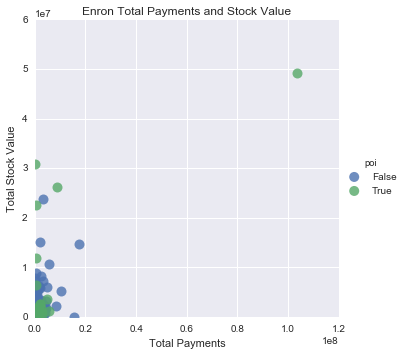

In [294]:
### re plot without outliers 
op = sns.lmplot(x = "total_payments", 
                y = "total_stock_value", 
                fit_reg = False, 
                hue = "poi",
                scatter_kws={"marker": "D",
                             "s": 100},
                data = df)

### set grid
plt.title("Enron Total Payments and Stock Value")
plt.xlabel("Total Payments")
plt.ylabel("Total Stock Value")
op.set(xlim=(0, None))
op.set(ylim=(0, None))

In [295]:
df[df['total_payments']>1e8].index.tolist()

['LAY KENNETH L']

We can now see that Kenneth Lay is the outlier in our dataset, however we will not remove him because he is a central figure in the Entron scandal and clearly a poi. Let's look at the spread of the plot with Kenneth Lay removed so we can get of insight of the other POI / NON POIs. 

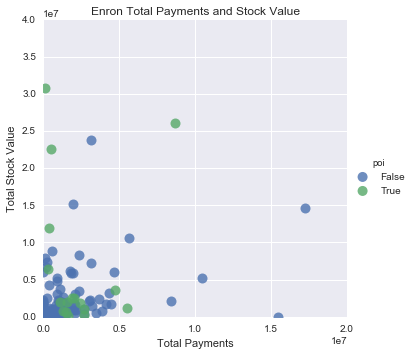

In [296]:
### re plot without outliers 
op = sns.lmplot(x = "total_payments", 
                y = "total_stock_value", 
                fit_reg = False, 
                hue = "poi",
                scatter_kws={"marker": "D",
                             "s": 100},
                data = df)

### set grid
plt.title("Enron Total Payments and Stock Value")
plt.xlabel("Total Payments")
plt.ylabel("Total Stock Value")
op.set(xlim=(0, 0.2e8))
op.set(ylim=(0, 4e7))

The spread is even between POI-NON/POIs and I believe this is a great place to start doing the investigation. If we need other cleaning of outliers we will perform those task once we have built a classificiation within our dataset. For now, this concludes the end of our outliers. 

## Feature Selection

The process when coding up a new feature is to use intuation, code up, visualize and repeat the process. Essentially, we want to go through the pdf of the enron dataset and look at possible ratios that could benefit our machine learning scores. Once again here are the features: 

* **Finacial Features** - ['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees'] (all units are in US dollars)


* **Email Features ** -  ['to_messages', 'email_address', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi'] (units are generally number of emails messages; notable exception is ‘email_address’, which is a text string)


* **POI Label** - [‘poi’] (boolean, represented as integer)


* **NEW FEATURES** - ['salary_bonus_ratio', 'exercised_ratio', 'total_sp_ratio', 'restricted_ratio','to_poi_ratio', 'from_poi_ratio'] 
                      
    * **salary_bonus_ratio** - ratio of salary to bonus. Maybe there might be some higher bonuses handed out betweedn the POI/NON-POIs that we might be able to get some possible scores on. 
    
    * **exercised_ratio** - if someone had the ability to have more insentive to exercise a cheaper option for stock it's possible it would be someone who could be a possible POI. 
    
    * **total_sp_ratio** - this is the ratio betweent he total_payments that were given and the total_stock value. Surely, some POIs that made alot of money would be represented in this data. 
    
    * **restricted_ratio** - wanted to see the relationship of shares issued to employees to the overal total stock value. Did Non-POIs get more or less than POIs. 
    
    * **to_poi_ratio** - I wanted to see if POIs have more chatter to each other if there is some weight that reffers to POIs
    
    * **from_poi_ratio** - This is a similary fashion of ratios that are from the POIs. Is there some weight behind email talk from similar people of interest

In [297]:
### Replace 0 to np.nan 
df.replace(0, np.nan, inplace= True)

In [298]:
### create new ratios for features. 

### financial features 
df['salary_bonus_ratio'] = df['salary'] / df['bonus']

df['exercised_ratio']    = df['exercised_stock_options'] / df['total_stock_value']

df['total_sp_ratio']     = df['total_payments'] / df['total_stock_value']

df['restricted_ratio']   = df['restricted_stock'] / df['total_stock_value']

### email features 
df['to_poi_ratio']   = df['from_this_person_to_poi'] / df['from_messages']

df['from_poi_ratio'] = df["from_poi_to_this_person"] / df['to_messages']

In [299]:
### create statistical metrics 

print df['salary_bonus_ratio'].describe()
print "\n"
print df['exercised_ratio'].describe()
print "\n"
print df['total_sp_ratio'].describe()
print "\n"
print df['restricted_ratio'].describe() 
print "\n"
print df["to_poi_ratio"].describe() 
print "\n",                  
print df['from_poi_ratio'].describe()

count    81.000000
mean      0.484357
std       0.454063
min       0.040762
25%       0.261879
50%       0.367837
75%       0.568920
max       3.157186
Name: salary_bonus_ratio, dtype: float64


count    100.000000
mean       0.718450
std        0.259644
min       -0.074502
25%        0.593739
50%        0.741886
75%        0.985011
max        1.000000
Name: exercised_ratio, dtype: float64


count    107.000000
mean       2.150159
std        5.109819
min       -2.324632
25%        0.298346
50%        0.872703
75%        2.122813
max       48.152302
Name: total_sp_ratio, dtype: float64


count    106.000000
mean       0.548519
std        0.474059
min        0.015152
25%        0.229783
50%        0.394025
75%        0.889520
max        3.493526
Name: restricted_ratio, dtype: float64


count    66.000000
mean      0.239830
std       0.210767
min       0.009302
25%       0.054855
50%       0.218968
75%       0.341400
max       1.000000
Name: to_poi_ratio, dtype: float64

count    74.00000

What we can observe here is the count for each new feature. Because some rows within the data were passed as ```NaN```, it won't be able to have a full 144 people (after TOTAL and AGENCY PARK) was removed. However, these look like some good metrics to investigate. Let's do some visual exploratory data before we bounce this back to a dictionary and then start evaluating classifications. 
 

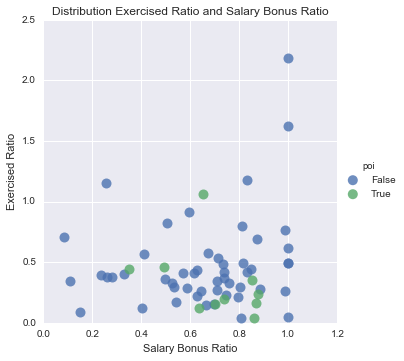

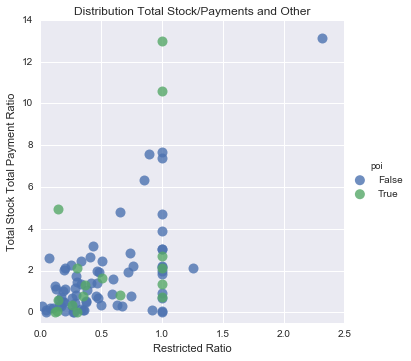

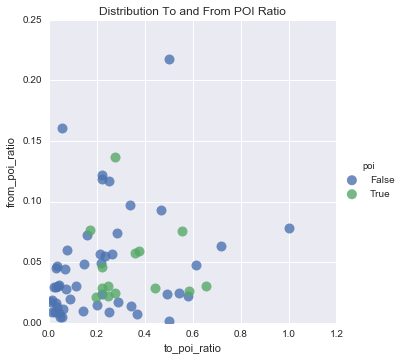

In [300]:
### New Features Exploratory Visuals

### Financial Features

fsp = sns.lmplot(x = "exercised_ratio", 
                 y = "salary_bonus_ratio", 
                 fit_reg = False, 
                 hue = "poi",
                 scatter_kws={"marker": "D",
                             "s": 100},
                 data = df)

plt.title("Distribution Exercised Ratio and Salary Bonus Ratio")
plt.xlabel("Salary Bonus Ratio")
plt.ylabel("Exercised Ratio")

fsp.set(xlim=(0,None))
fsp.set(ylim=(0,None))


fsp = sns.lmplot(x = "restricted_ratio", 
                 y = "total_sp_ratio", 
                 fit_reg = False, 
                 hue = "poi",
                 scatter_kws={"marker": "D",
                             "s": 100},
                 data = df)

plt.title("Distribution Total Stock/Payments and Other")
plt.xlabel("Restricted Ratio")
plt.ylabel("Total Stock Total Payment Ratio")

fsp.set(xlim=(0,2.5))
fsp.set(ylim=(-.5,None))



### Email Features

fsp = sns.lmplot(x = "to_poi_ratio", 
                 y = "from_poi_ratio", 
                 fit_reg = False, 
                 hue = "poi",
                 scatter_kws={"marker": "D",
                             "s": 100},
                 data = df)

plt.title("Distribution To and From POI Ratio")
plt.xlabel("to_poi_ratio")
plt.ylabel("from_poi_ratio")

fsp.set(xlim=(0,None))
fsp.set(ylim=(0,None))


After some tuning a visualization and re tuning and re visualization I finally found the features I wanted and honestly, these are pretty awesome! Once we get into the evaluations of the metrics I believe we are going to get some great Recall, Precision, True Positives, False Negatives and False Positives by using a confusion matrix. These are the extra features I will be preparing in the new data set and I'm happy to move on to the classification part of the exercise.

In [301]:
### Describe Data, Replace np.nan to "NaN" and create a Dictionary. 

### Step 1 - Give me some statistics please. 
print df.describe() 

### Step 2 - replace np.nan --> "NaN" 
df.replace(np.nan, "NaN", inplace = True)

### Step 3 - Create dictionary 
data_dict = df.to_dict('index')

              bonus  deferral_payments  deferred_income  director_fees  \
count  8.100000e+01       3.800000e+01     4.800000e+01      16.000000   
mean   1.201773e+06       8.416025e+05    -5.810498e+05   89822.875000   
std    1.441679e+06       1.289323e+06     9.420764e+05   41112.700735   
min    7.000000e+04      -1.025000e+05    -3.504386e+06    3285.000000   
25%    4.250000e+05       7.964450e+04    -6.112092e+05   83674.500000   
50%    7.500000e+05       2.210635e+05    -1.519270e+05  106164.500000   
75%    1.200000e+06       8.672112e+05    -3.792600e+04  112815.000000   
max    8.000000e+06       6.426990e+06    -8.330000e+02  137864.000000   

       exercised_stock_options       expenses  from_messages  \
count             1.010000e+02      94.000000      86.000000   
mean              2.959559e+06   54192.010638     608.790698   
std               5.499450e+06   46108.377454    1841.033949   
min               3.285000e+03     148.000000      12.000000   
25%          

In [302]:
### Step 4 - Confirm this works 
print "This is Kenneth Lay:", data_dict['LAY KENNETH L']

This is Kenneth Lay: {'to_messages': 4273.0, 'deferral_payments': 202911.0, 'exercised_ratio': 0.6994161972212709, 'restricted_ratio': 0.30058380277872904, 'salary_bonus_ratio': 0.1531887142857143, 'expenses': 99832.0, 'poi': True, 'long_term_incentive': 3600000.0, 'email_address': 'kenneth.lay@enron.com', 'from_poi_to_this_person': 123.0, 'deferred_income': -300000.0, 'restricted_stock_deferred': 'NaN', 'shared_receipt_with_poi': 2411.0, 'loan_advances': 81525000.0, 'from_messages': 36.0, 'other': 10359729.0, 'to_poi_ratio': 0.4444444444444444, 'director_fees': 'NaN', 'total_sp_ratio': 2.108727927493823, 'bonus': 7000000.0, 'total_stock_value': 49110078.0, 'from_this_person_to_poi': 16.0, 'from_poi_ratio': 0.028785396676807865, 'restricted_stock': 14761694.0, 'salary': 1072321.0, 'total_payments': 103559793.0, 'exercised_stock_options': 34348384.0}


## Machine Learning Export 

First, I need to select the features I would like to use. Best way to do this is just try all the features and then size them down until you are happy with the ones you have chosen. Let's look at the features again: 

* **Finacial Features** - ['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees'] (all units are in US dollars)


* **Email Features ** -  ['to_messages', 'email_address', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi'] (units are generally number of emails messages; notable exception is ‘email_address’, which is a text string)


* **POI Label** - [‘poi’] (boolean, represented as integer)


* **NEW FEATURES** - ['salary_bonus_ratio', 'exercised_ratio', 'total_sp_ratio', 'restricted_ratio','to_poi_ratio', 'from_poi_ratio'] 

Above are the selected features you need to use in order to tune the classification model the correct way. This is bassically just plug and chug until we get something that looks semi-useful. I am not including the "email_adress" because I don't think it's necessary considering that I'm not doing any text learning.

In [309]:
### Store to my_dataset for easy export below. 

my_dataset = data_dict 

In [317]:
### import classifiers, splitters, metrics

from sklearn.svm import SVC                                ### Support vector machine 
from sklearn import tree                                   ### Decision Tree 
from sklearn.naive_bayes import GaussianNB                 ### Naive Bayes
from sklearn.neighbors import KNeighborsClassifier as knnc ### KNeighbors

from time import time 

from sklearn import cross_validation        ### CV
from sklearn import accuracy_score          ### Accuracy
from sklearn import confusion_matrix        ### Confusion 
from sklearn.metrics import precision_score ### Precision 
from sklearn.metrics import recall_score    ### Recall Score


### Extract features and labels from dataset for local teseting

features_list = ['poi','salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 
                 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 
                 'long_term_incentive', 'restricted_stock', 'director_fees','to_messages',  
                 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi', 
                 'salary_bonus_ratio', 'exercised_ratio', 'total_sp_ratio', 
                 'restricted_ratio','to_poi_ratio', 'from_poi_ratio']

### local testing data
data = featureFormat(my_dataset,features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)


### sanity check 
pprint.pprint(labels[0:3])
pprint.pprint(features[0:1])

ImportError: cannot import name accuracy_score

## Try a varity of Classifiers